In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
I_FOLDER = "./image_sets"
O_FOLDER = "./dataset"
SINGLE_CLASS_FILENAME = "dataset_single_class.csv"
MULTI_CLASS_FILENAME = "dataset_multi_class.csv"

SINGLE_CLASS_PATH = os.path.join(O_FOLDER, SINGLE_CLASS_FILENAME)
MULTI_CLASS_PATH = os.path.join(O_FOLDER, MULTI_CLASS_FILENAME)

N_CLASSES = 20

In [3]:
classes = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

assert len(classes) == N_CLASSES

In [4]:
classes_map = {c: i for i, c in enumerate(classes, start=1)}
classes_map

{'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [5]:
train_val_multiple_class_dict = {}
train_val_multiple_class_dict

{}

In [6]:
file_processed = 0

for filename in os.listdir(I_FOLDER):
    file_path = os.path.join(I_FOLDER, filename)
    with open(file_path) as f:
        print(f"Processing file {file_path}")
        record_image_labels = False
        if filename.endswith("_train.txt"):
            print("\tSkipping file")
            continue
        elif filename.endswith("_val.txt"):
            print("\tSkipping file")
            continue
        elif filename.endswith("_trainval.txt"):
            pass
        else:
            print(f"\tSkipping file {file_path}")
            continue
        class_name = filename.split("_")[0]
        if not class_name in classes_map:
            print(f"\tSkipping class {class_name}")
            continue
        for line in f:
            try:
                file, flag = line.strip().split()
                flag = int(flag)
                if flag == 1:
                    train_val_multiple_class_dict[file] = train_val_multiple_class_dict.get(file, []) + [classes_map[class_name]]
            except Exception as e:
                print(f"\tError processing line: {line}. Error: {e}")
        file_processed += 1

assert file_processed == N_CLASSES

train_val_multiple_class_dict

Processing file ./image_sets\aeroplane_train.txt
	Skipping file
Processing file ./image_sets\aeroplane_trainval.txt
Processing file ./image_sets\aeroplane_val.txt
	Skipping file
Processing file ./image_sets\bicycle_train.txt
	Skipping file
Processing file ./image_sets\bicycle_trainval.txt
Processing file ./image_sets\bicycle_val.txt
	Skipping file
Processing file ./image_sets\bird_train.txt
	Skipping file
Processing file ./image_sets\bird_trainval.txt
Processing file ./image_sets\bird_val.txt
	Skipping file
Processing file ./image_sets\boat_train.txt
	Skipping file
Processing file ./image_sets\boat_trainval.txt
Processing file ./image_sets\boat_val.txt
	Skipping file
Processing file ./image_sets\bottle_train.txt
	Skipping file
Processing file ./image_sets\bottle_trainval.txt
Processing file ./image_sets\bottle_val.txt
	Skipping file
Processing file ./image_sets\bus_train.txt
	Skipping file
Processing file ./image_sets\bus_trainval.txt
Processing file ./image_sets\bus_val.txt
	Skipping 

{'2008_000021': [1],
 '2008_000033': [1],
 '2008_000037': [1],
 '2008_000064': [1],
 '2008_000151': [1],
 '2008_000197': [1],
 '2008_000251': [1, 7],
 '2008_000291': [1],
 '2008_000367': [1, 15],
 '2008_000585': [1],
 '2008_000716': [1],
 '2008_000756': [1],
 '2008_000804': [1],
 '2008_000805': [1],
 '2008_000883': [1],
 '2008_001054': [1, 15],
 '2008_001227': [1, 15],
 '2008_001380': [1],
 '2008_001448': [1],
 '2008_001468': [1],
 '2008_001546': [1],
 '2008_001719': [1],
 '2008_001774': [1],
 '2008_001801': [1],
 '2008_001805': [1],
 '2008_001971': [1],
 '2008_001985': [1],
 '2008_002000': [1],
 '2008_002138': [1, 7],
 '2008_002151': [1],
 '2008_002195': [1],
 '2008_002221': [1],
 '2008_002358': [1],
 '2008_002454': [1],
 '2008_002551': [1],
 '2008_002673': [1],
 '2008_002698': [1],
 '2008_002719': [1],
 '2008_002773': [1, 4],
 '2008_002977': [1, 7],
 '2008_003033': [1],
 '2008_003041': [1],
 '2008_003059': [1],
 '2008_003155': [1],
 '2008_003189': [1],
 '2008_003196': [1],
 '2008_003

In [7]:
train_val_multiple_class_df = pd.DataFrame(train_val_multiple_class_dict.items(), columns=["file", "classes_id"])
train_val_multiple_class_df["classes"] = train_val_multiple_class_df["classes_id"].apply(lambda x: [classes[id - 1] for id in x])
train_val_multiple_class_df["n_classes"] = train_val_multiple_class_df["classes_id"].apply(len)

train_val_multiple_class_df

,file,classes_id,classes,n_classes
0,2008_000021,[1],[aeroplane],1
1,2008_000033,[1],[aeroplane],1
2,2008_000037,[1],[aeroplane],1
3,2008_000064,[1],[aeroplane],1
4,2008_000151,[1],[aeroplane],1
...,...,...,...,...
11535,2011_002292,[20],[tvmonitor],1
11536,2011_002514,[20],[tvmonitor],1
11537,2011_002879,[20],[tvmonitor],1
11538,2011_002942,[20],[tvmonitor],1


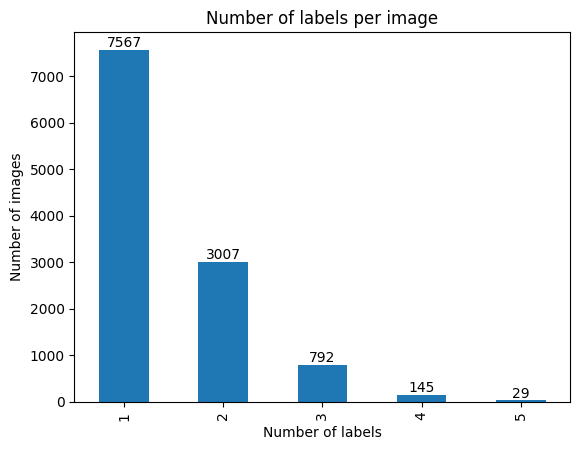

In [8]:
train_val_multiple_class_count_df = train_val_multiple_class_df["n_classes"].value_counts()
train_val_multiple_class_count_df.plot(kind="bar")

for index, value in train_val_multiple_class_count_df.items():
    plt.text(index - 1, value, str(value), ha='center', va='bottom')

plt.xlabel("Number of labels")
plt.ylabel("Number of images")
plt.title("Number of labels per image")
plt.show()

In [9]:
train_val_multiple_class_df[train_val_multiple_class_df["n_classes"] == 5].head(10)

,file,classes_id,classes,n_classes
823,2008_008097,"[2, 6, 7, 14, 15]","[bicycle, bus, car, motorbike, person]",5
920,2009_002203,"[2, 6, 7, 14, 15]","[bicycle, bus, car, motorbike, person]",5
957,2009_003251,"[2, 9, 11, 15, 16]","[bicycle, chair, diningtable, person, pottedpl...",5
1170,2011_001524,"[2, 7, 9, 14, 15]","[bicycle, car, chair, motorbike, person]",5
2264,2009_003351,"[4, 9, 14, 15, 16]","[boat, chair, motorbike, person, pottedplant]",5
2328,2010_001535,"[4, 5, 9, 11, 15]","[boat, bottle, chair, diningtable, person]",5
2431,2011_001221,"[4, 9, 11, 15, 16]","[boat, chair, diningtable, person, pottedplant]",5
2554,2008_002776,"[5, 9, 15, 18, 20]","[bottle, chair, person, sofa, tvmonitor]",5
2740,2009_000577,"[5, 9, 12, 15, 18]","[bottle, chair, dog, person, sofa]",5
2770,2009_001605,"[5, 12, 15, 18, 20]","[bottle, dog, person, sofa, tvmonitor]",5


In [10]:
COLUMNS = ["file", "class_id", "class"]
train_val_single_class_df = pd.DataFrame([(image, labels[0], classes[labels[0] - 1]) for image, labels in train_val_multiple_class_dict.items() if len(labels) == 1], columns=COLUMNS)
assert len(train_val_single_class_df) == train_val_multiple_class_count_df.loc[1]

train_val_single_class_df

,file,class_id,class
0,2008_000021,1,aeroplane
1,2008_000033,1,aeroplane
2,2008_000037,1,aeroplane
3,2008_000064,1,aeroplane
4,2008_000151,1,aeroplane
...,...,...,...
7562,2011_002292,20,tvmonitor
7563,2011_002514,20,tvmonitor
7564,2011_002879,20,tvmonitor
7565,2011_002942,20,tvmonitor


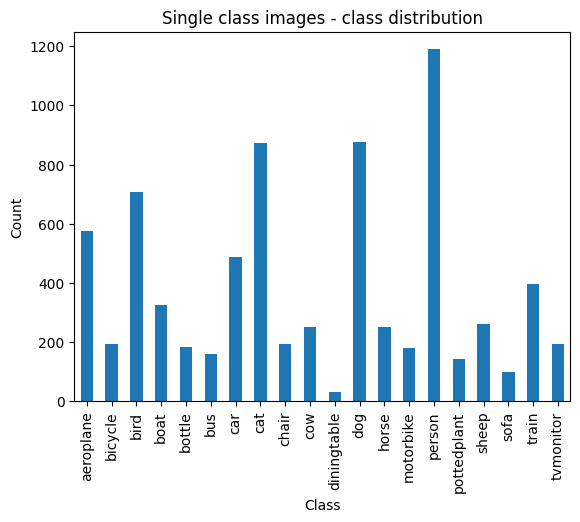

In [11]:
train_val_single_class_df.groupby("class").size().plot(kind="bar", legend=False)

plt.title("Single class images - class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [12]:
train_val_single_class_df.to_csv(SINGLE_CLASS_PATH, index=False)
train_val_multiple_class_df.to_csv(MULTI_CLASS_PATH, index=False)